In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=932eea3c9418d5072ded84bddf4da0c9


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | carauari
Processing Record 2 of Set 1 | camacupa
Processing Record 3 of Set 1 | hilo
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | marzuq
Processing Record 6 of Set 1 | sitka
Processing Record 7 of Set 1 | show low
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | barrow
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | hasaki
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | lompoc
Processing Record 16 of Set 1 | coahuayana
Processing Record 17 of Set 1 | belyy yar
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | uruguaiana
Processing Record 20 of Set 1 | solnechnyy
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | coffs harbour
Processing Record

Processing Record 40 of Set 4 | kavieng
Processing Record 41 of Set 4 | kochubey
Processing Record 42 of Set 4 | pisco
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | moyobamba
Processing Record 45 of Set 4 | carutapera
Processing Record 46 of Set 4 | tiruvottiyur
City not found. Skipping...
Processing Record 47 of Set 4 | juifang
City not found. Skipping...
Processing Record 48 of Set 4 | oriximina
Processing Record 49 of Set 4 | yzeure
Processing Record 50 of Set 4 | gornyy
Processing Record 1 of Set 5 | goba
Processing Record 2 of Set 5 | avera
Processing Record 3 of Set 5 | zelenoborskiy
Processing Record 4 of Set 5 | ilhabela
Processing Record 5 of Set 5 | wanning
Processing Record 6 of Set 5 | ahipara
Processing Record 7 of Set 5 | saryshagan
City not found. Skipping...
Processing Record 8 of Set 5 | mangrol
Processing Record 9 of Set 5 | burica
City not found. Skipping...
Processing Record 10 of Set 5 | buchanan
Processing Record 11 of Set 5 | lebu
P

Processing Record 27 of Set 8 | kondinskoye
Processing Record 28 of Set 8 | utiroa
City not found. Skipping...
Processing Record 29 of Set 8 | jieshi
Processing Record 30 of Set 8 | vila velha
Processing Record 31 of Set 8 | teshie
Processing Record 32 of Set 8 | ixtapa
Processing Record 33 of Set 8 | aflu
City not found. Skipping...
Processing Record 34 of Set 8 | khani
Processing Record 35 of Set 8 | ilo
Processing Record 36 of Set 8 | cap malheureux
Processing Record 37 of Set 8 | pevek
Processing Record 38 of Set 8 | galle
Processing Record 39 of Set 8 | sistranda
Processing Record 40 of Set 8 | hambantota
Processing Record 41 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 42 of Set 8 | goderich
Processing Record 43 of Set 8 | thanh hoa
Processing Record 44 of Set 8 | jiddah
City not found. Skipping...
Processing Record 45 of Set 8 | adrar
Processing Record 46 of Set 8 | shimanovsk
Processing Record 47 of Set 8 | srednekolymsk
Processing Record 48 of Set 8 | urul

Processing Record 13 of Set 12 | north bend
Processing Record 14 of Set 12 | beringovskiy
Processing Record 15 of Set 12 | akyab
Processing Record 16 of Set 12 | isangel
Processing Record 17 of Set 12 | altay
Processing Record 18 of Set 12 | faya
Processing Record 19 of Set 12 | mugur-aksy
Processing Record 20 of Set 12 | verkhoyansk
Processing Record 21 of Set 12 | dhidhdhoo
Processing Record 22 of Set 12 | novyy urgal
Processing Record 23 of Set 12 | yadrin
Processing Record 24 of Set 12 | houston
Processing Record 25 of Set 12 | rongcheng
Processing Record 26 of Set 12 | sorong
Processing Record 27 of Set 12 | kavaratti
Processing Record 28 of Set 12 | belaya rechka
Processing Record 29 of Set 12 | noshiro
Processing Record 30 of Set 12 | piacabucu
Processing Record 31 of Set 12 | taoudenni
Processing Record 32 of Set 12 | ust-kuyga
Processing Record 33 of Set 12 | mokhsogollokh
Processing Record 34 of Set 12 | warmbad
Processing Record 35 of Set 12 | kenai
Processing Record 36 of S

In [10]:
len(city_data)

560

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carauari,-4.8828,-66.8958,74.41,97,98,2.30,BR,2022-05-11 23:54:45
1,Camacupa,-12.0167,17.4833,56.95,63,56,4.54,AO,2022-05-11 23:57:37
2,Hilo,19.7297,-155.0900,85.28,80,25,10.00,US,2022-05-11 23:57:38
3,Marzuq,14.4000,46.4667,73.90,37,34,3.42,YE,2022-05-11 23:57:39
4,Sitka,57.0531,-135.3300,48.81,66,100,2.68,US,2022-05-11 23:57:39
5,Show Low,34.2542,-110.0298,71.89,12,0,29.93,US,2022-05-11 23:55:14
6,Hermanus,-34.4187,19.2345,56.73,79,0,6.15,ZA,2022-05-11 23:48:39
7,Barrow,71.2906,-156.7887,28.42,86,100,17.27,US,2022-05-11 23:51:11
8,Vaini,-21.2000,-175.2000,77.16,69,40,12.66,TO,2022-05-11 23:57:40
9,Avarua,-21.2078,-159.7750,82.45,78,75,11.50,CK,2022-05-11 23:48:31


In [12]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Carauari,BR,2022-05-11 23:54:45,-4.8828,-66.8958,74.41,97,98,2.30
1,Camacupa,AO,2022-05-11 23:57:37,-12.0167,17.4833,56.95,63,56,4.54
2,Hilo,US,2022-05-11 23:57:38,19.7297,-155.0900,85.28,80,25,10.00
3,Marzuq,YE,2022-05-11 23:57:39,14.4000,46.4667,73.90,37,34,3.42
4,Sitka,US,2022-05-11 23:57:39,57.0531,-135.3300,48.81,66,100,2.68
5,Show Low,US,2022-05-11 23:55:14,34.2542,-110.0298,71.89,12,0,29.93
6,Hermanus,ZA,2022-05-11 23:48:39,-34.4187,19.2345,56.73,79,0,6.15
7,Barrow,US,2022-05-11 23:51:11,71.2906,-156.7887,28.42,86,100,17.27
8,Vaini,TO,2022-05-11 23:57:40,-21.2000,-175.2000,77.16,69,40,12.66
9,Avarua,CK,2022-05-11 23:48:31,-21.2078,-159.7750,82.45,78,75,11.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

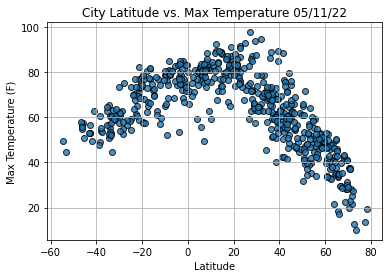

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

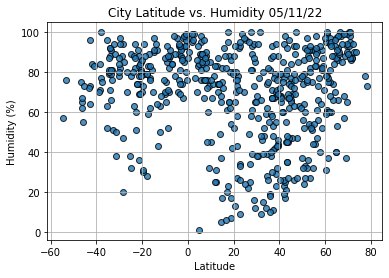

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

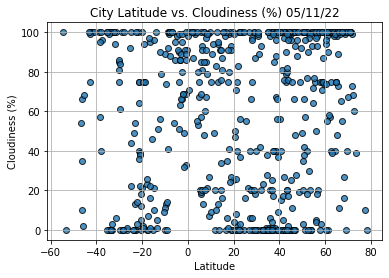

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

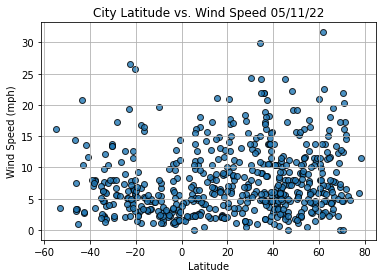

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


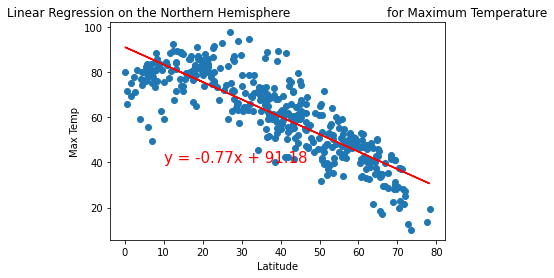

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

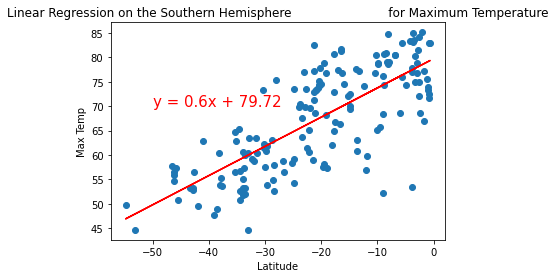

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,70))


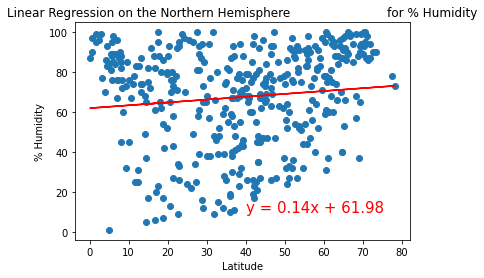

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

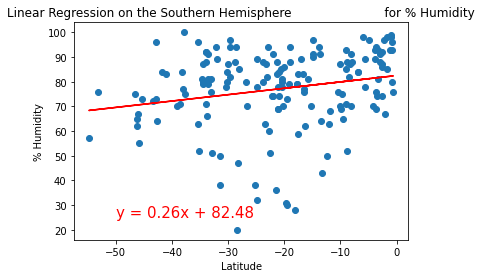

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,25))

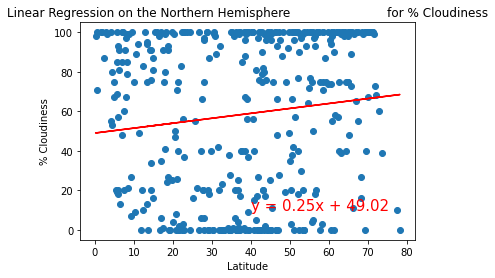

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

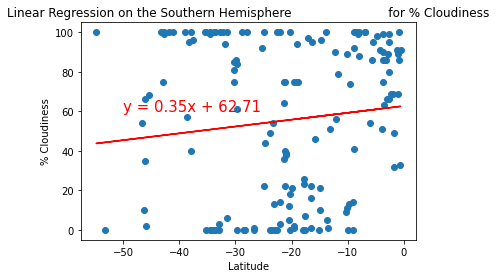

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

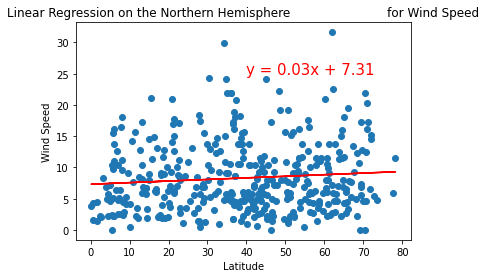

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

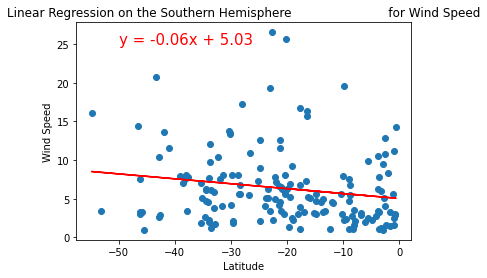

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))